In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings
%matplotlib inline

In [3]:
# Reading the dataset to dataframe

df = pd.read_csv("Influencer.csv")
df.head(10)


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


In [4]:
# Shape of dataset

df.shape

(200, 10)

# Data Cleaninig

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


 
 Only 'Country Or Region' has null values and will fill it with mode of the column.
 Rest few columns are of object type, should be converted to int or float dtype
 

In [6]:
df['Country Or Region'].mode()

0    United States
Name: Country Or Region, dtype: object

In [7]:

# Filling NaN values

df['Country Or Region'] = df['Country Or Region'].fillna(df['Country Or Region'].mode()[0])


In [8]:
# Checking null values in dataset
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

 
 Now, dataset has no NaN values
 

In [9]:
# Converting posts variable dtype to float and replacing 'k' with ''

df['Posts']= df['Posts'].astype(str).str.replace('k','')
df['Posts']= df['Posts'].astype(float)

In [10]:
type(df['Posts'][0])

numpy.float64

In [11]:
df.head(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915.0,0.010,3.5m,6.1b,United States
3,4,\nselenagomez,93,348.8m,6.1m,1.9,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8,0.003,932.0k,12.6b,United States


In [12]:
# Checking uniques values for feature

df['Followers'].unique()  

array(['485.2m', '370.7m', '363.9m', '348.8m', '339.4m', '333.0m',
       '330.7m', '276.1m', '273.9m', '260.0m', '258.9m', '241.1m',
       '239.2m', '226.1m', '223.1m', '215.9m', '202.7m', '199.4m',
       '183.6m', '179.4m', '173.3m', '154.2m', '153.3m', '141.3m',
       '140.6m', '136.3m', '133.7m', '125.8m', '125.5m', '121.4m',
       '121.2m', '112.5m', '106.4m', '88.0m', '87.3m', '83.2m', '83.1m',
       '82.7m', '82.6m', '76.7m', '76.2m', '75.9m', '75.4m', '75.2m',
       '73.4m', '72.7m', '71.4m', '71.2m', '71.1m', '70.5m', '70.2m',
       '69.3m', '68.1m', '67.9m', '67.5m', '66.6m', '66.5m', '65.4m',
       '64.7m', '64.4m', '63.6m', '63.5m', '63.4m', '63.3m', '62.9m',
       '62.7m', '60.8m', '60.4m', '59.0m', '58.8m', '58.6m', '58.3m',
       '58.0m', '56.8m', '56.0m', '55.8m', '55.5m', '55.2m', '55.1m',
       '54.5m', '54.3m', '54.1m', '53.7m', '53.5m', '53.3m', '52.9m',
       '51.9m', '51.7m', '51.2m', '51.1m', '51.0m', '50.9m', '50.3m',
       '50.0m', '49.9m', '49.7m'

In [13]:
# Converting Followers variable dtype to float and replacing 'm' with '000'

df['Followers']= df['Followers'].astype(str).str.replace('m','000')
df['Followers']= df['Followers'].astype(float)


In [14]:
# Converting 'Avg. Likes' variable dtype to float and replacing 'm' with '000' and 'k' with ''

value = []
for each in list(df['Avg. Likes']):
    if 'm' in each:
        each = each.replace('m', '000')
        value.append(each)
    else:
        each = each.replace('k', '')
        value.append(each)
        
df['Avg. Likes']= value 
df['Avg. New Post Avg. LikesLikes']= df['Avg. Likes'].astype(float)

In [15]:
df['New Post Avg. Likes'].unique()

array(['6.3m', '5.0m', '3.5m', '1.7m', '932.0k', '3.1m', '2.2m', '404.7k',
       '3.0m', '168.7k', '193.6k', '3.3m', '1.2m', '2.7m', '837.1k',
       '1.3m', '702.4k', '302.9k', '137.6k', '7.5m', '2.0m', '305.1k',
       '6.9m', '1.0m', '682.0k', '59.2k', '1.4m', '237.9k', '807.2k',
       '4.9m', '735.9k', '1.5m', '505.8k', '1.1m', '644.6k', '7.2m',
       '278.0k', '281.8k', '517.7k', '25.9k', '585.9k', '216.2k', '5.4m',
       '1.8m', '2.6m', '616.3k', '480.1k', '7.9m', '2.8m', '467.8k',
       '1.6m', '289.7k', '842.9k', '926.8k', '262.8k', '413.8k', '4.6m',
       '631.4k', '595.7k', '604.2k', '347.8k', '467.5k', '665.5k',
       '505.9k', '4.8m', '989.2k', '268.4k', '5.1m', '552.9k', '553.7k',
       '150.4k', '283.7k', '515.3k', '330.8k', '783.6k', '652.7k',
       '586.8k', '720.1k', '686.1k', '410.8k', '47.7k', '826.2k', '12.9m',
       '40.9k', '212.8k', '539.1k', '267.4k', '545.6k', '159.3k', '72.4k',
       '40.5k', '199.8k', '219.3k', '328.8k', '2.9m', '291.4k', '252.5k',

In [16]:

# Converting 'New Post Avg. Likes' variable dtype to float and replacing 'm' with '000' and 'k' with ''

value = []
for each in list(df['New Post Avg. Likes']):
    if 'm' in each:
        each = each.replace('m', '000')
        value.append(each)
    else:
        each = each.replace('k', '')
        value.append(each)
        
df['New Post Avg. Likes']= value 
df['New Post Avg. Likes']= df['New Post Avg. Likes'].astype(float)


In [17]:
df['Total Likes'].unique()

array(['29.1b', '57.4b', '6.1b', '11.4b', '12.6b', '18.5b', '19.8b',
       '7.3b', '9.8b', '14.0b', '3.7b', '3.0b', '307.5m', '1.3b', '5.3b',
       '5.0b', '12.9b', '7.8b', '1.6b', '14.4b', '1.5b', '4.1b', '20.8b',
       '113.3m', '18.0b', '4.9b', '7.1b', '9.0b', '3.4b', '11.5b', '6.0b',
       '2.3b', '2.7b', '2.5b', '4.3b', '5.6b', '2.1b', '1.9b', '7.9b',
       '432.0m', '2.8b', '3.3b', '4.7b', '4.6b', '8.8b', '434.6m', '2.6b',
       '6.6b', '622.7m', '1.8b', '2.4b', '472.6m', '5.4b', '3.8b', '4.0b',
       '4.4b', '9.7b', '5.1b', '1.2b', '10.3b', '675.9m', '1.7b', '3.5b',
       '2.2b', '8.6b', '1.1b', '442.2m', '424.8m', '2.0b', '753.9m',
       '1.0b', '837.1m', '327.2m', '4.2b', '750.0m', '2.9b', '783.5m',
       '9.6b', '22.8m', '3.2b', '861.0m', '756.6m', '829.8m', '795.4m',
       '402.1m', '958.9m', '839.0m', '590.9m', '75.0m', '745.9m',
       '854.9m', '446.5m', '1.4b', '535.5m', '508.8m', '568.2m', '444.0m',
       '204.9m', '603.6m', '637.0m', '671.9m', '61.4m', '936

In [18]:

# Converting 'Total Likes' variable dtype to float and replacing 'm' with '000' and 'b' with '000000'

value = []
for each in list(df['Total Likes']):
    if 'm' in each:
        each = each.replace('m', '000')
        value.append(each)
    else:
        each = each.replace('b', '000000')
        value.append(each)
        
df['Total Likes']= value 
df['Total Likes']= df['Total Likes'].astype(float)


In [19]:

df.head(5)


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
0,1,\ncristiano,92,485.2,8.7000,3.4,0.013,6.3,29.1,Spain,8.7
1,2,kyliejenner,91,370.7,8.2000,7.0,0.014,5.0,57.4,United States,8.2
2,3,\nleomessi,90,363.9,6.7000,915.0,0.010,3.5,6.1,United States,6.7
3,4,\nselenagomez,93,348.8,6.1000,1.9,0.005,1.7,11.4,United States,6.1
4,5,\ntherock,91,339.4,1.8000,6.8,0.003,932.0,12.6,United States,1.8



'Channel Info' has unique name for each rank, this should not have relevance on final model hence can be droped


In [50]:

# Dropping 'Channel Info' column

df = df.drop('Channel Info', axis=1)
df.head(3)


,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
0,1,92,485.2,8.7,3.4,0.013,6.3,29.1,Spain,8.7
1,2,91,370.7,8.2,7.0,0.014,5.0,57.4,United States,8.2
2,3,90,363.9,6.7,915.0,0.010,3.5,6.1,United States,6.7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           200 non-null    int64  
 1   Channel Info                   200 non-null    object 
 2   Influence Score                200 non-null    int64  
 3   Followers                      200 non-null    float64
 4   Avg. Likes                     200 non-null    object 
 5   Posts                          200 non-null    float64
 6   60-Day Eng Rate                200 non-null    float64
 7   New Post Avg. Likes            200 non-null    float64
 8   Total Likes                    200 non-null    float64
 9   Country Or Region              200 non-null    object 
 10  Avg. New Post Avg. LikesLikes  200 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.3+ KB


In [36]:

# converting object dtype to flote dtype

df['Avg. Likes'] = df['Avg. Likes'].astype(str).astype(float)


# EDA & Feature Engineering

In [21]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
0,1,\ncristiano,92,485.2,8.7000,3.4,0.013,6.3,29.1,Spain,8.7
1,2,kyliejenner,91,370.7,8.2000,7.0,0.014,5.0,57.4,United States,8.2
2,3,\nleomessi,90,363.9,6.7000,915.0,0.010,3.5,6.1,United States,6.7
3,4,\nselenagomez,93,348.8,6.1000,1.9,0.005,1.7,11.4,United States,6.1
4,5,\ntherock,91,339.4,1.8000,6.8,0.003,932.0,12.6,United States,1.8


In [126]:

# Checking duplicates in dataset

df.duplicated().sum()


0


Dataset has no duplicate values


In [48]:
df['Channel Info'].unique()

200

In [25]:
df['Country Or Region'].unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

# Max Correlation coefficient of pair feature

In [59]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_16716\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Avg. New Post Avg. LikesLikes
Rank,1.000000,-0.354843,-0.698193,0.224216,0.041473,0.028900,0.035253,0.298060,0.224216
Influence Score,-0.354843,1.000000,0.365428,-0.055406,-0.101800,-0.072460,-0.092789,-0.039814,-0.055406
Followers,-0.698193,0.365428,1.000000,-0.222745,-0.016959,-0.107439,-0.129328,-0.194437,-0.222745
Avg. Likes,0.224216,-0.055406,-0.222745,1.000000,-0.083036,-0.263579,0.289257,0.076673,1.000000
Posts,0.041473,-0.101800,-0.016959,-0.083036,1.000000,0.152780,-0.070261,0.298826,-0.083036
60-Day Eng Rate,0.028900,-0.072460,-0.107439,-0.263579,0.152780,1.000000,-0.240742,-0.041694,-0.263579
New Post Avg. Likes,0.035253,-0.092789,-0.129328,0.289257,-0.070261,-0.240742,1.000000,0.006746,0.289257
Total Likes,0.298060,-0.039814,-0.194437,0.076673,0.298826,-0.041694,0.006746,1.000000,0.076673
Avg. New Post Avg. LikesLikes,0.224216,-0.055406,-0.222745,1.000000,-0.083036,-0.263579,0.289257,0.076673,1.000000


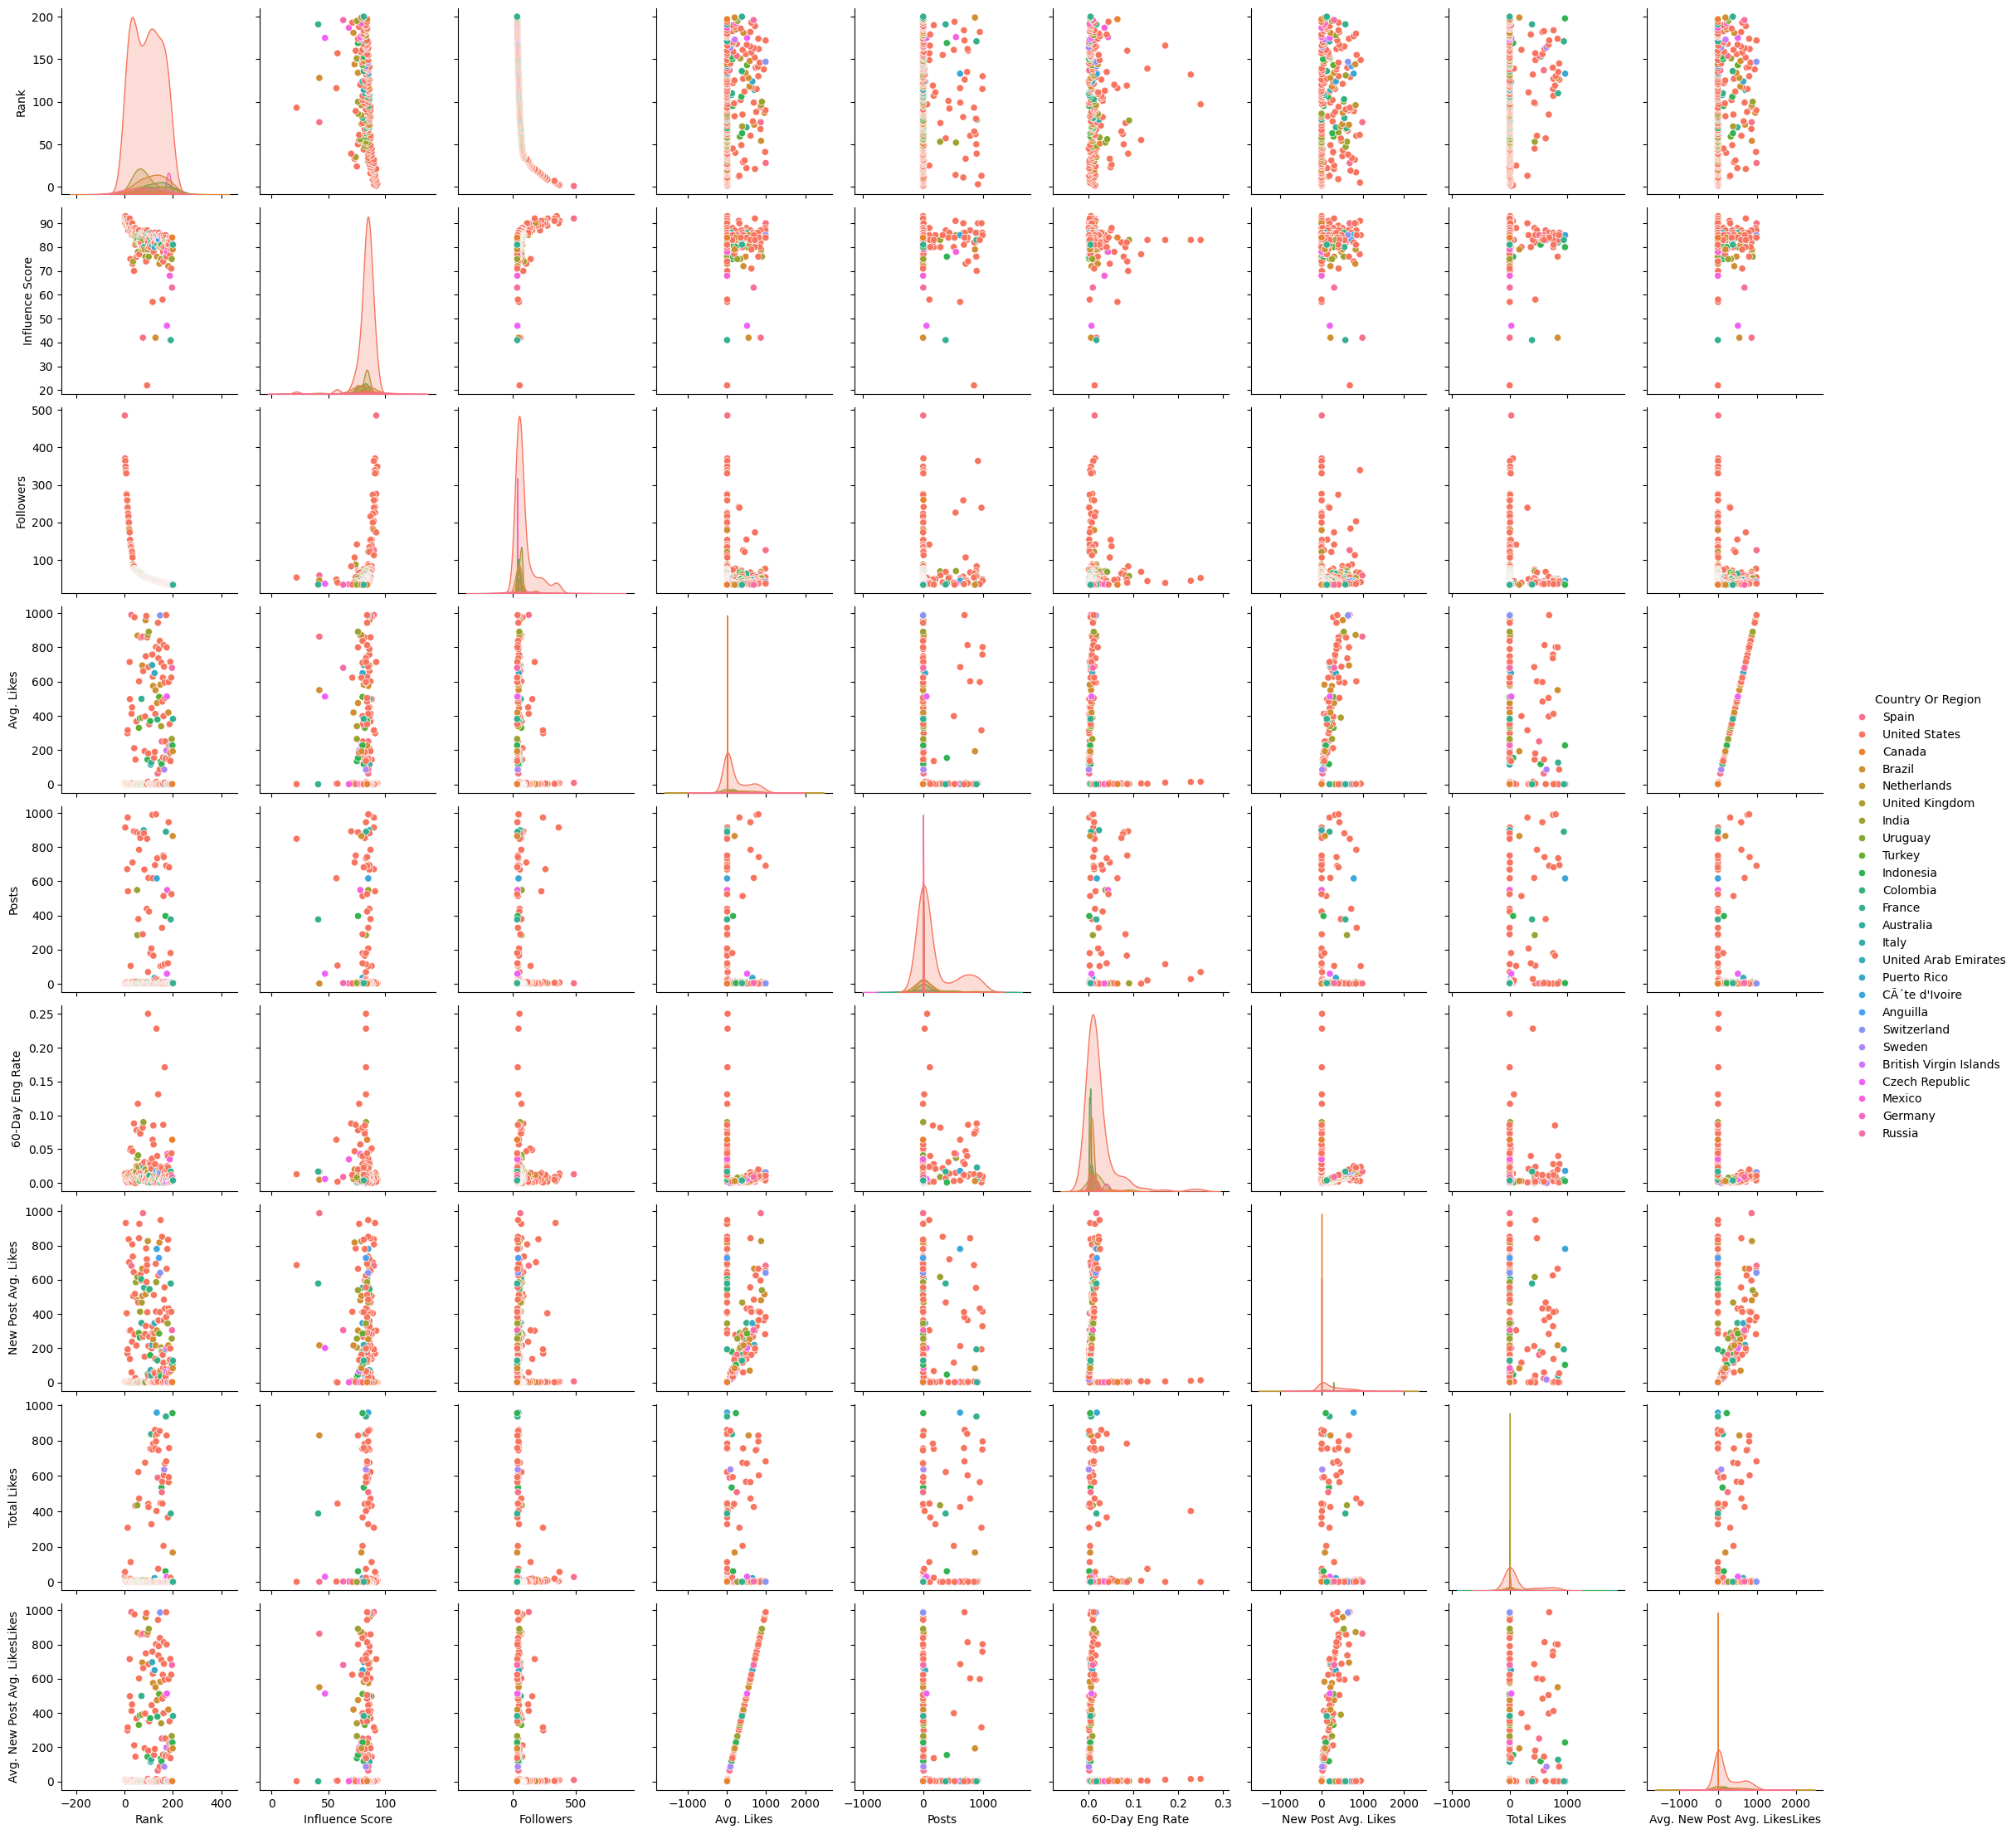

In [68]:

# Bivariate analysis of dataset using pairplot

sns.pairplot(df, hue='Country Or Region')


In [58]:

# finding correlation coefficient between 'Avg. New Post Avg. LikesLikes' and 'Avg. Likes'

max_coeff = df[['Avg. New Post Avg. LikesLikes', 'Avg. Likes']].corr(method='pearson')
max_coeff_value = max_coeff.loc['Avg. New Post Avg. LikesLikes','Avg. Likes']
print(max_coeff_value)


1.0


# Frequency Distributions :
   1. Influence score
   2. Followers
   3. posts

Text(0, 0.5, 'Frequency Counts')

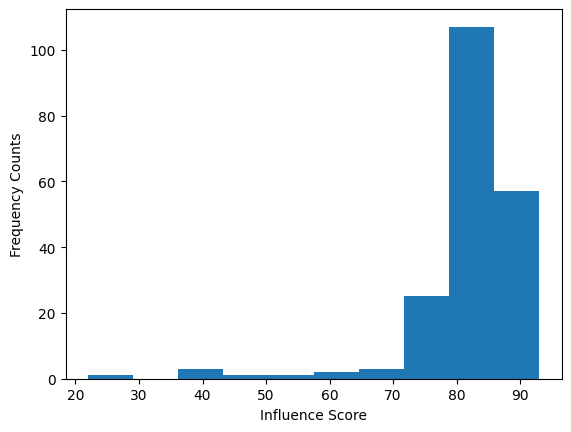

In [89]:
# Frequency plot of Influence Score

plt.hist(df['Influence Score'])
plt.xlabel('Influence Score')
plt.ylabel('Frequency Counts')


Text(0, 0.5, 'Frequency Counts')

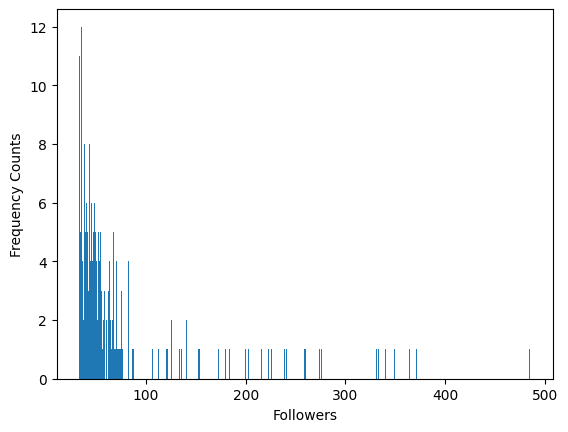

In [90]:
# Frequency plot of followers

data = df['Followers']
plt.hist(df['Followers'], bins=np.arange(df['Followers'].min(), df['Followers'].max()+1))
plt.xlabel('Followers')
plt.ylabel('Frequency Counts')


Text(0, 0.5, 'Frequency Counts')

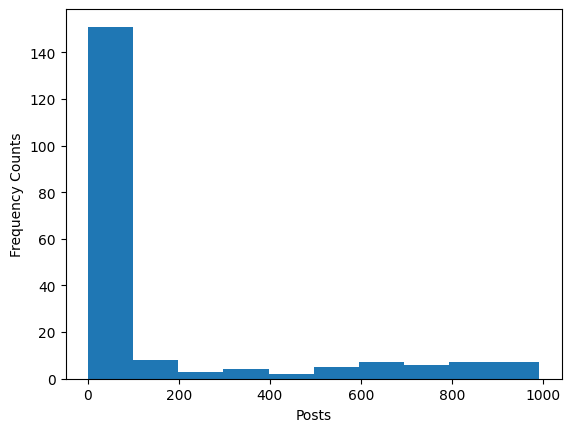

In [91]:
# Frequency plot of Posts

plt.hist(df['Posts'])
plt.xlabel('Posts')
plt.ylabel('Frequency Counts')



# Countrywise Influencers count -Bar plot


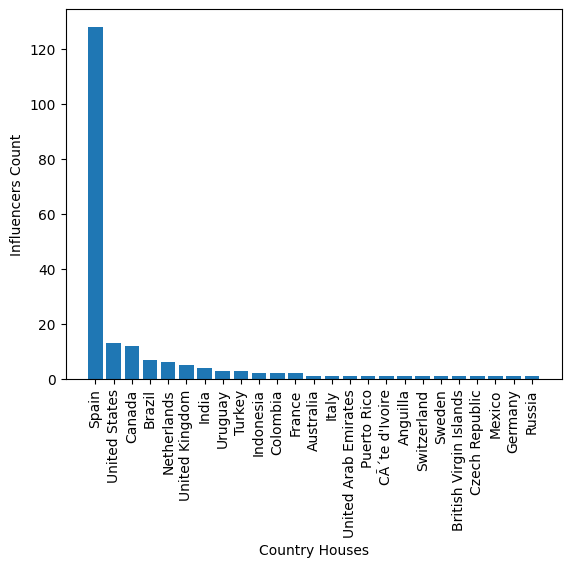

In [111]:

Countrys = df['Country Or Region'].unique()
Influencers = df['Country Or Region'].value_counts()

plt.bar(Countrys, Influencers)
plt.xlabel('Country Houses')
plt.ylabel('Influencers Count')
plt.xticks(rotation =90)
plt.show()


# Top 10 Influencers based on:
   1. Followers
   2. Average likes
   3. Total likes

In [117]:
# Top 10 followers of influencers

df.sort_values(by=['Followers'], ascending=False).head(10)

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
0,1,92,485.2,8.7,3.4,0.013,6.3,29.1,Spain,8.7
1,2,91,370.7,8.2,7.0,0.014,5.0,57.4,United States,8.2
2,3,90,363.9,6.7,915.0,0.010,3.5,6.1,United States,6.7
3,4,93,348.8,6.1,1.9,0.005,1.7,11.4,United States,6.1
4,5,91,339.4,1.8,6.8,0.003,932.0,12.6,United States,1.8
5,6,92,333.0,3.7,5.0,0.009,3.1,18.5,United States,3.7
6,7,91,330.7,3.5,5.7,0.005,1.7,19.8,United States,3.5
7,8,92,276.1,3.6,2.0,0.008,2.2,7.3,United States,3.6
8,9,89,273.9,2.4,4.1,0.002,404.7,9.8,United States,2.4
9,10,91,260.0,1.9,7.4,0.007,1.7,14.0,Canada,1.9


In [116]:
# Top 10 average likes of influencers

df.sort_values(by=['Avg. Likes'], ascending=False).head(10)


,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
27,28,90,125.8,989.6,7.1,0.005,682.0,7.1,Spain,989.6
171,172,84,36.6,988.4,691.0,0.011,382.5,683.0,United States,988.4
146,147,85,41.4,986.9,1.8,0.016,641.0,1.8,Switzerland,986.9
89,90,87,53.5,983.7,2.3,0.012,652.7,2.2,United States,983.7
40,41,88,76.2,976.1,2.0,0.004,281.8,1.9,United States,976.1
86,87,86,54.3,958.9,5.6,0.010,515.3,5.4,Brazil,958.9
137,138,84,43.4,943.5,3.0,0.009,363.1,2.9,United States,943.5
99,100,76,51.0,891.5,2.7,0.011,539.1,2.4,India,891.5
95,96,79,51.9,872.5,10.4,0.016,826.2,9.0,Netherlands,872.5
53,54,78,68.1,868.9,3.0,0.007,480.1,2.6,Brazil,868.9


In [119]:
# Top 10 total likes

df.sort_values(by=['Total Likes'], ascending=False).head(10)


,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Avg. New Post Avg. LikesLikes
132,133,85,44.2,1.6,617.0,0.018,780.5,958.9,CÃ´te d'Ivoire,1.6
197,198,80,33.6,227.8,4.2,0.003,103.2,955.9,Indonesia,227.8
170,171,83,36.7,1.1,890.0,0.005,193.6,936.6,France,1.1
125,126,86,45.6,1.2,695.0,0.028,1.3,861.0,United States,1.2
144,145,85,41.8,86.6,9.9,0.001,54.1,854.9,United States,86.6
134,135,83,43.8,1.1,735.0,0.040,1.6,839.0,United States,1.1
109,110,82,48.9,127.5,6.6,0.001,40.5,837.1,France,127.5
127,128,42,45.1,550.6,1.5,0.005,217.2,829.8,Brazil,550.6
173,174,76,36.1,800.4,1.0,0.020,664.5,829.2,United States,800.4
129,130,85,44.4,801.8,992.0,0.010,414.8,795.4,United States,801.8


# Plot relationship between below features:
   1. Followers & Total likes
   2. Followers & Influence score
   3. Posts & Average likes
   4. Posts & Influence score

Text(0, 0.5, 'Total Likes ')

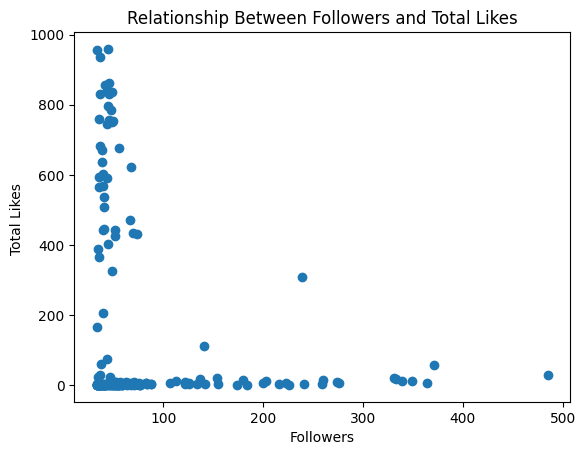

In [121]:

plt.scatter(df['Followers'],df['Total Likes'])
plt.title('Relationship Between Followers and Total Likes')
plt.xlabel("Followers")
plt.ylabel("Total Likes ")


Text(0, 0.5, 'influence Score ')

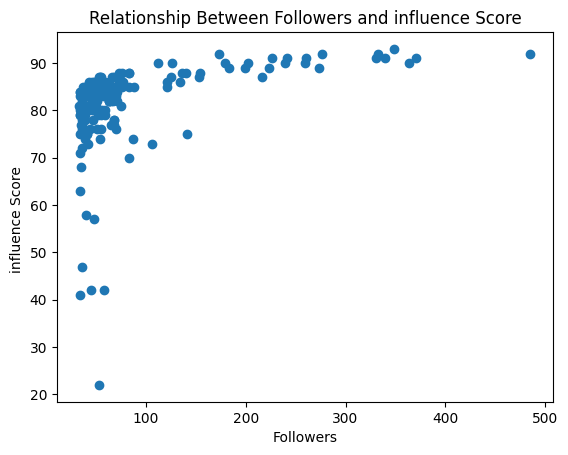

In [123]:

plt.scatter(df['Followers'],df['Influence Score'])
plt.title('Relationship Between Followers and influence Score')
plt.xlabel("Followers")
plt.ylabel("influence Score ")


Text(0, 0.5, 'Average likes')

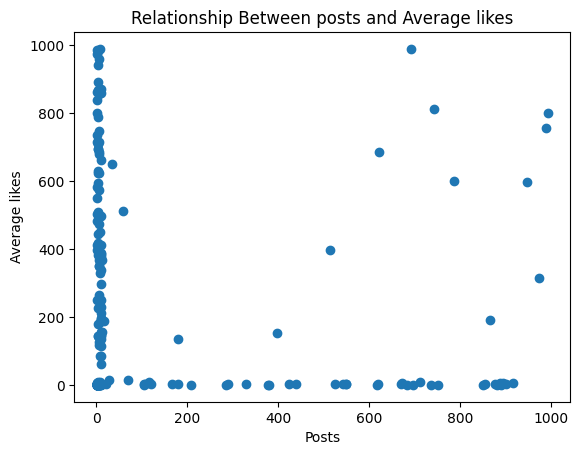

In [124]:

plt.scatter(df['Posts'],df['Avg. Likes'])
plt.title('Relationship Between posts and Average likes')
plt.xlabel("Posts")
plt.ylabel("Average likes")


Text(0, 0.5, 'Influence Score')

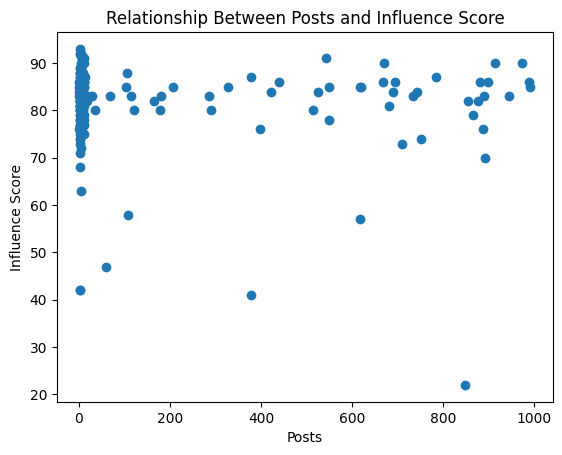

In [125]:

plt.scatter(df['Posts'],df['Influence Score'])
plt.title('Relationship Between Posts and Influence Score')
plt.xlabel("Posts")
plt.ylabel("Influence Score")
